In [1]:
%matplotlib inline

In [2]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats
import pathlib
from collections import defaultdict
import itertools
sns.set_context("paper")

In [3]:
names = ["Word", "POS", "Lemma"]

In [4]:
p = pathlib.Path("res/final")

In [5]:
fr = {v.name:pd.read_table(str(v), header=None, names=names) for v in (p/"fr").iterdir()}
print(len(fr))
print(fr.keys())

17
dict_keys(['LeLoupBlanc', 'SurLaPierreBlanche', 'LaSarcelleBleue', 'Letincelle', 'MademoiselleDeMaupin', 'LesTroisMousquetaires', 'LesCornielles', 'Zola', 'kourroglou', 'LesFilsDuSoliel', 'LeCapitainePaul', 'unCouerDeFemme', 'Adolphe', 'LaNiania', 'BelleRose', 'LeSorcierDeMeudon', 'LaCapitaine'])


In [6]:
for text in fr.values(): # group word types
    text["POS"] = text["POS"].map(lambda x: x.split(":")[0]).astype('category')

1291821
NOM    0.187764
VER    0.186246
PRO    0.151485
PRP    0.138189
DET    0.114451
ADV    0.072628
KON    0.054858
ADJ    0.053444
NAM    0.039005
INT    0.001247
ABR    0.000681
dtype: float64


(-1.0126189918942907,
 1.0000000000041744,
 -1.0055489444116044,
 1.0191071016480944)

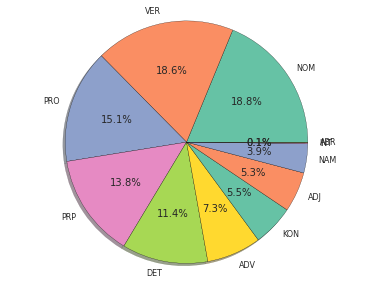

In [7]:
print(pd.concat(fr).POS.count())
print(pd.concat(fr).POS.value_counts()/pd.concat(fr).POS.count())
plt.pie(pd.concat(fr).POS.value_counts()/pd.concat(fr).POS.count(), shadow=True,
                                                                    autopct='%1.1f%%', 
                                                                    colors=sns.color_palette("Set2"),
                                                                    labels=(pd.concat(fr).POS.value_counts()/pd.concat(fr).POS.count()).index)
plt.axis('equal')

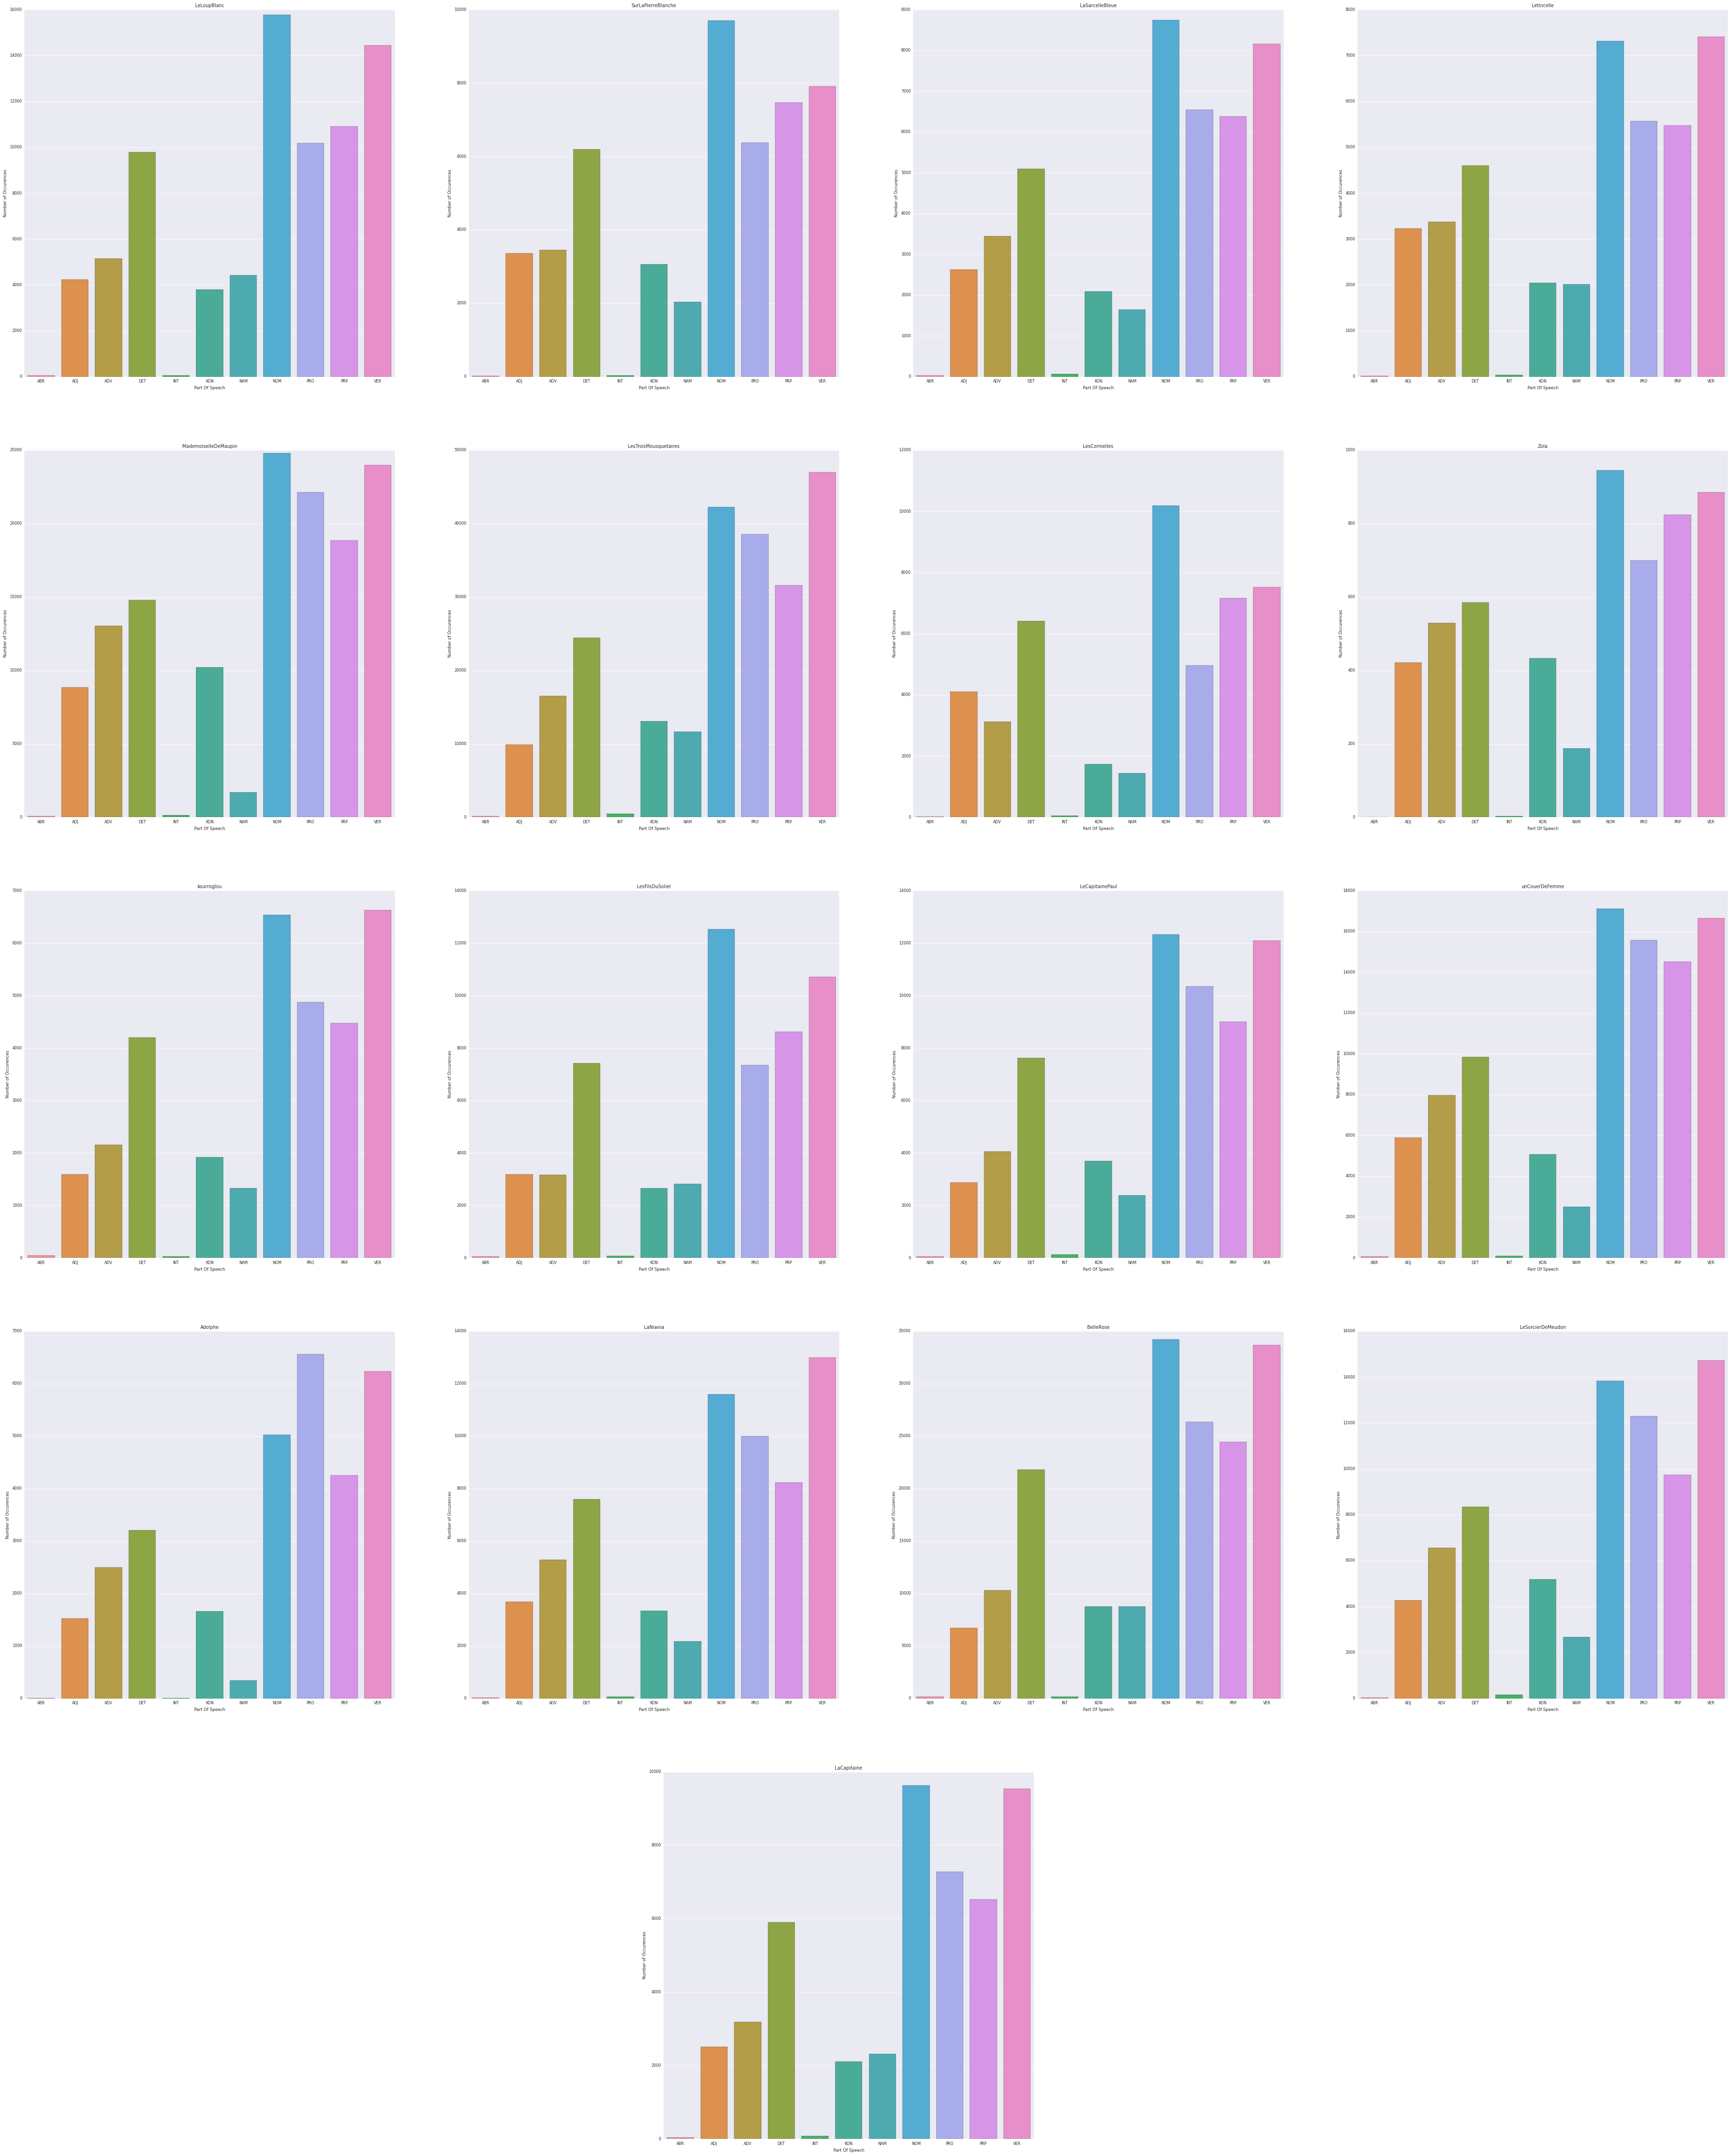

In [8]:
f,axes = plt.subplots(5,4, figsize=(64,80))
for (i,text) in enumerate(fr):
    sns.countplot(x=fr[text].POS,ax=axes[i//4][i%4])
    axes[i//4][i%4].set_title(text)
    axes[i//4][i%4].set_xlabel("Part Of Speech")
    axes[i//4][i%4].set_ylabel("Number of Occurences")
axes[4][1].set_axis_off()
axes[4][2].set_axis_off()
axes[4][3].set_axis_off()
pos = axes[4][0].get_position()
axes[4][0].set_position(pos=[0.5-pos.width/2,pos.y0,pos.width,pos.height])

In [9]:
en = {v.name:pd.read_table(str(v), header=None, names=names) for v in (p/"en").iterdir()}
print(len(en))
print(en.keys())

17
dict_keys(['GulliverOfMars', 'KingAlfredsViking', 'TheAmbassador', 'TheFirePeople', 'Kidnapped', 'Sybil', 'RingOnceForDeath', 'TheNativeSoil', 'HallOfMirrors', 'Frankenstein', 'TheHourOfTheDragon', 'TwoThousandMilesBelow', 'TarzanOfTheApes', 'TheRivalHeirs', 'TheRubyOfKishmoor', 'RobinHood', 'TheCallOfTheWild'])


In [10]:
for text in en: # remove bad inputs
    en[text] = en[text][en[text].POS.isin(['NN', 'IN', 'NP', 'PP', 'WRB', 'DT', 'CC', 'VBD', 'POS', 'NPS',
       'RB', 'TO', 'JJ', 'VBN', 'PP$', 'VB', 'NNS', 'MD', 'VBG', 'RP',
       'WP', 'JJS', 'JJR', 'VBP', 'WDT', 'VBZ', 'PDT', 'EX', 'WP$',
       'RBS', 'RBR', 'UH'])]

In [11]:
en_groups = {"CC" : "KON",
"CD" : "NUM",
"DT" : "DET",
"EX" : "VER",
"FW" : "NOM",
"IN" : "PRP",
"JJ" : "ADJ",
"JJR" : "ADJ",
"JJS" : "ADJ",
"LS" : "LIS",
"MD" : "VER",
"NN" : "NOM",
"NNS" : "NOM",
"NP" : "NAM",
"NPS" : "NAM",
"PDT" : "DET",
"POS" : "PRO",
"PP" : "PRO",
"PP$" : "PRO",
"RB" : "ADV",
"RBR" : "ADV",
"RBS" : "ADV",
"RP" : "PRP",
"SYM" : "SYM",
"TO" : "PRP",
"UH" : "INT",
"VB" : "VER",
"VBD" : "VER",
"VBG" : "VER",
"VBN" : "VER",
"VBP" : "VER",
"VBZ" : "VER",
"WDT" : "DET",
"WP" : "PRO",
"WP$" : "PRO",
"WRB" : "ADV"}

In [12]:
for text in en.values(): # group word types
    text.POS = text.POS.map(lambda x: en_groups[x]).astype('category')

932950
VER    20.211373
NOM    18.412884
PRP    15.197170
PRO    11.917037
DET    11.577684
ADV     7.149794
ADJ     6.869607
KON     4.528539
NAM     4.023045
INT     0.112868
dtype: float64


(-1.0095624469436102,
 1.0000000000596525,
 -1.0070595743069619,
 1.0149250631620552)

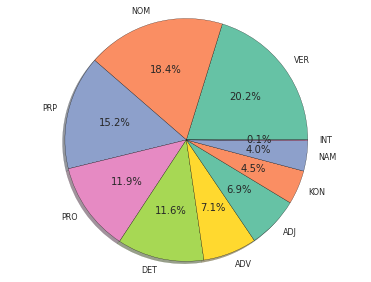

In [13]:
print(pd.concat(en).POS.count())
print(pd.concat(en).POS.value_counts()/pd.concat(en).POS.count()*100)
plt.pie(pd.concat(en).POS.value_counts()/pd.concat(en).POS.count(), shadow=True,
                                                                    autopct='%1.1f%%', 
                                                                    colors=sns.color_palette("Set2"),
                                                                    labels=(pd.concat(en).POS.value_counts()/pd.concat(en).POS.count()).index)
plt.axis('equal')

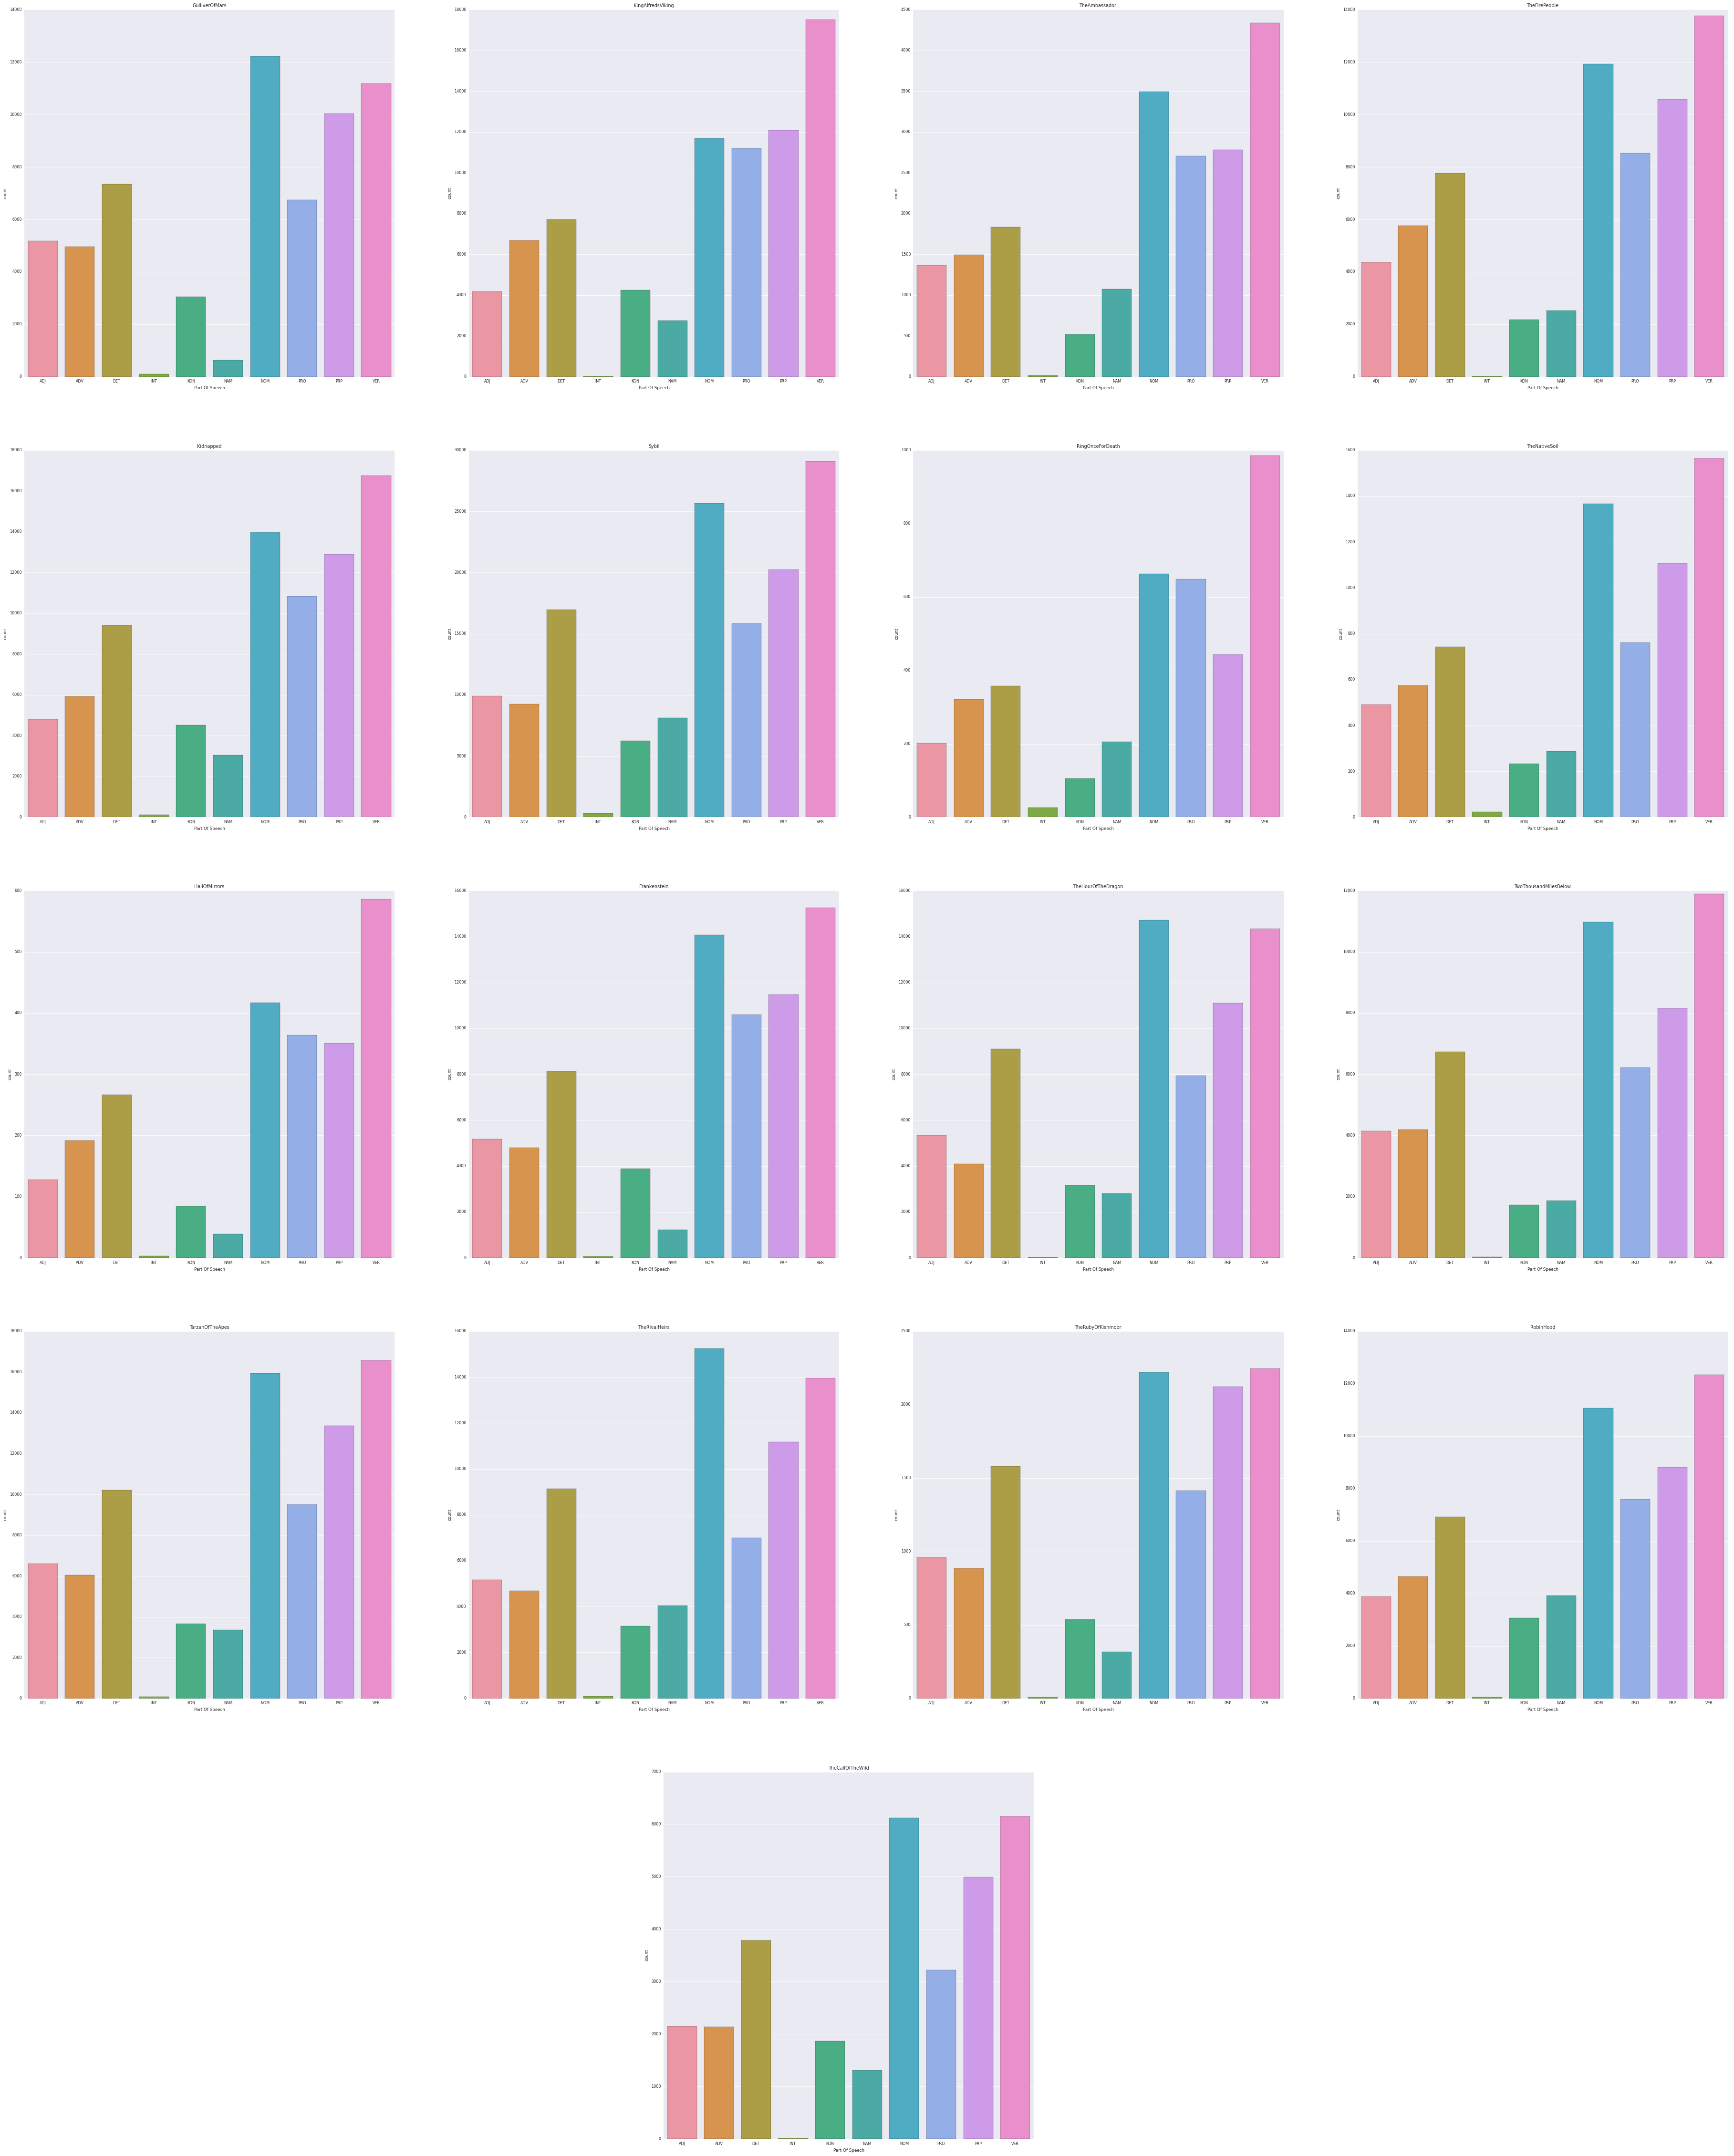

In [14]:
f,axes = plt.subplots(5,4, figsize=(64,80))
for (i,text) in enumerate(en):
    sns.countplot(x=en[text].POS,ax=axes[i//4][i%4])
    axes[i//4][i%4].set_title(text)
    axes[i//4][i%4].set_xlabel("Part Of Speech")
axes[4][1].set_axis_off()
axes[4][2].set_axis_off()
axes[4][3].set_axis_off()
pos = axes[4][0].get_position()
axes[4][0].set_position(pos=[0.5-pos.width/2,pos.y0,pos.width,pos.height])

In [15]:
it = {v.name:pd.read_table(str(v), header=None, names=names) for v in (p/"it").iterdir()}
print(len(it))
print(it.keys())

11
dict_keys(['LaMessaDiNozze', 'AmoreBendato', 'LaLanternaDiDiogene', 'LeVergineDelleRocce', 'CastaDiva', 'IlPonteDelParadiso', 'IlNemicoEInNoi', 'SantaCecilia', 'UnaDonna', 'Abrakadabra', 'Limmorale'])


In [16]:
for text in it.values(): # group word types
    text["POS"] = text["POS"][text["POS"]!="ORD"][text["POS"]!="FW"].map(lambda x: x.split(":")[0]).astype('category')

560221
NOM    25.281987
VER    18.231555
PRE    14.743646
PRO    10.391792
ADJ     9.335423
DET     8.818663
ADV     6.982066
CON     4.955366
NPR     1.119737
INT     0.071936
ABR     0.067830
dtype: float64


(-1.0070756761569151, 1.0, -1.0047508983448148, 1.0021959857012919)

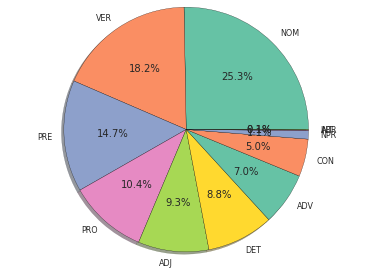

In [17]:
print(pd.concat(it).POS.count())
print(pd.concat(it).POS.value_counts()/pd.concat(it).POS.count()*100)
plt.pie(pd.concat(it).POS.value_counts()/pd.concat(it).POS.count(), shadow=True,
                                                                    autopct='%1.1f%%', 
                                                                    colors=sns.color_palette("Set2"),
                                                                    labels=(pd.concat(it).POS.value_counts()/pd.concat(it).POS.count()).index)
plt.axis('equal')

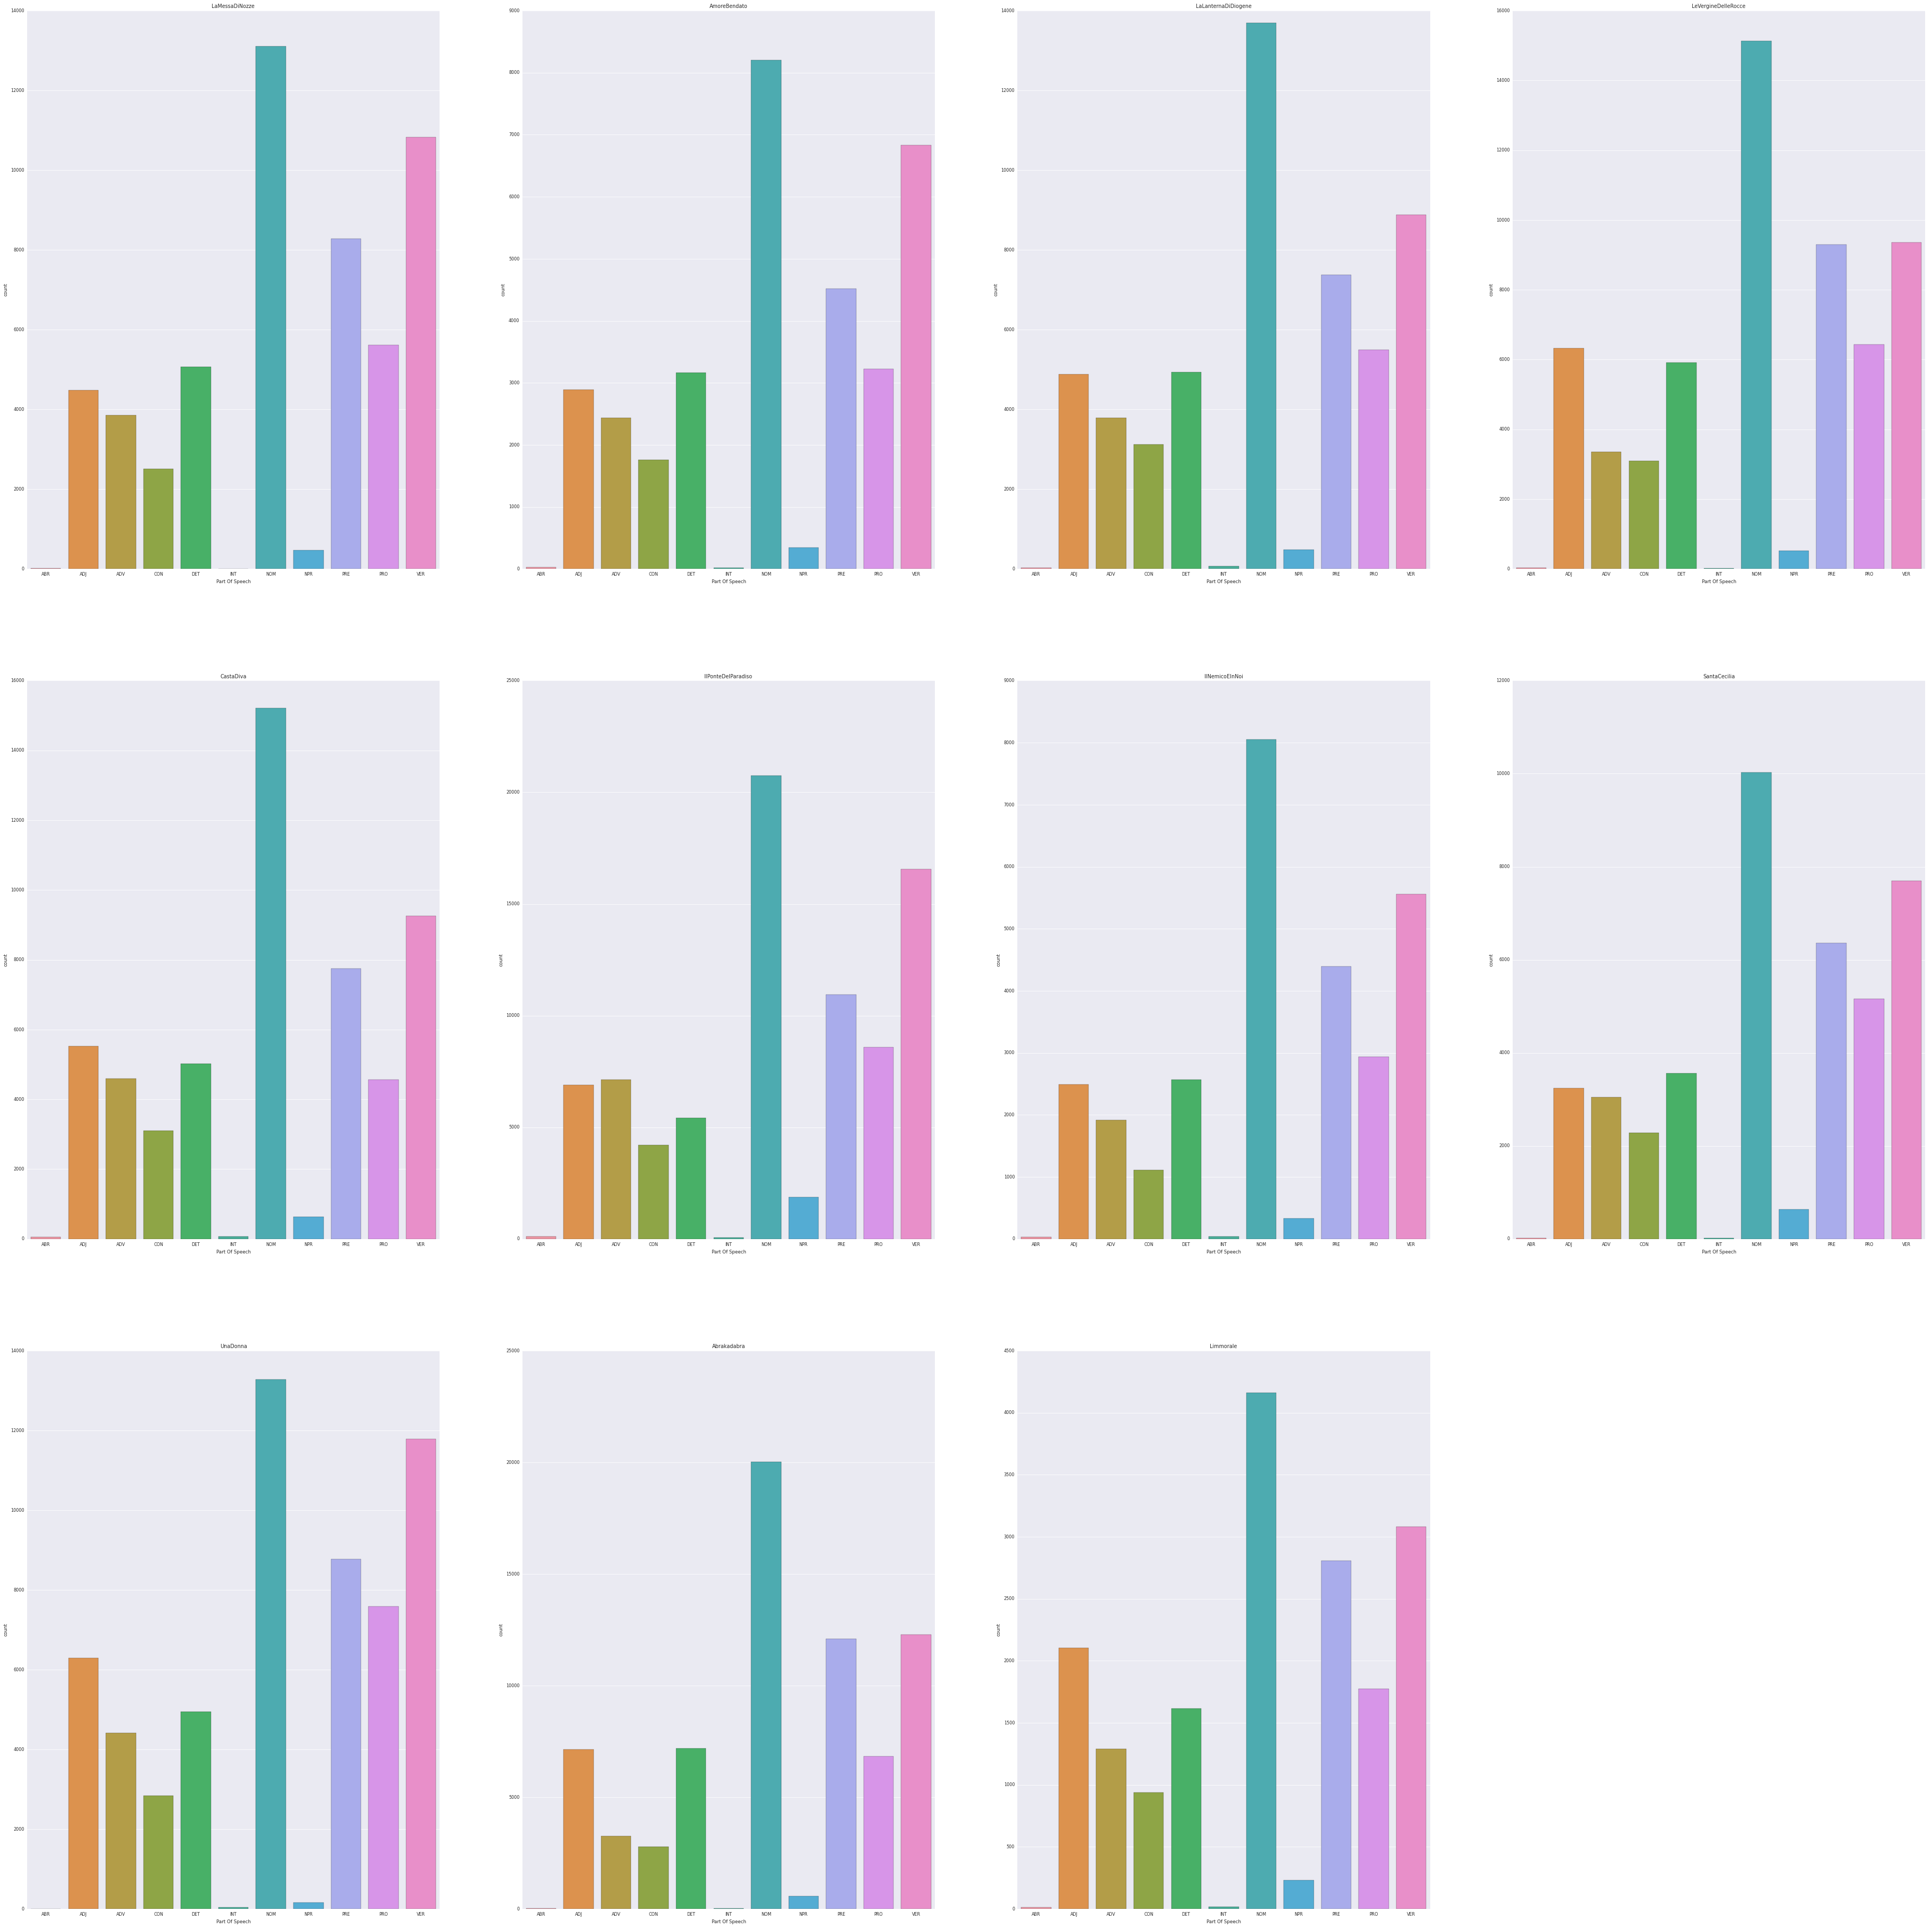

In [18]:
f,axes = plt.subplots(3,4, figsize=(64,64))
for (i,text) in enumerate(it):
    sns.countplot(x=it[text].POS,ax=axes[i//4][i%4])
    axes[i//4][i%4].set_title(text)
    axes[i//4][i%4].set_xlabel("Part Of Speech")
axes[2][3].set_axis_off()
# pos = axes[2][0].get_position()
# axes[2][0].set_position(pos=[0.5-pos.width/2,pos.y0,pos.width,pos.height])

In [19]:
de = {v.name:pd.read_table(str(v), header=None, names=names) for v in (p/"de").iterdir()}
print(len(de))
print(de.keys())

15
dict_keys(['FaustDerTragodieZweiterTeil', 'Halbtier', 'KoeniglicheHoheit', 'Immensee', 'DasKlosterbeiSendomir', 'AusdemLebeneinesTaugenichts', 'DieHuldigungderKuenste', 'DerTraumeinLeben', 'FaustDerTragodieErsterTeil', 'DieSchafnerinDieMaechtigen', 'DerNachsommer', 'DerGoldeneTopf', 'DerzerbrocheneKrug', 'DerunheilbringendeKrone', 'Todsuenden'])


In [20]:
de_groups = {
    "ADJA":"ADJ",
    "ADJD":"ADJ",
    "ADV":"ADV",
    "APPR":"PRP",
    "APPRART":"PRP",
    "APPO":"PRP",
    "APZR":"PRP",
    "ART":"DET",
    "CARD":"NOM",
    "FM":"NOM",
    "ITJ":"INT",
    "KOUI":"KON",
    "KOUS":"KON",
    "KON":"KON",
    "KOKOM":"KON",
    "NN":"NOM",
    "NE":"NAM",
    "PDS":"PRO",
    "PDAT":"PRO",
    "PIS":"PRO",
    "PIAT":"PRO",
    "PIDAT":"PRO",
    "PPER":"PRO",
    "PPOSS":"PRO",
    "PPOSAT":"PRO",
    "PRELS":"PRO",
    "PRELAT":"PRO",
    "PRF":"PRO",
    "PWS":"PRO",
    "PWAT":"PRO",
    "PWAV":"PRO",
    "PAV":"ADV",
    "PTKZU": "DET",
    "PTKNEG":"DET",
    "PTKVZ":"DET",
    "PTKANT":"DET",
    "PTKA":"DET",
    "TRUNC":"ABR",
    "VVFIN":"VER",
    "VVIMP":"VER",
    "VVINF":"VER",
    "VVIZU":"VER",
    "VVPP":"VER",
    "VAFIN":"VER",
    "VAIMP":"VER",
    "VAINF":"VER",
    "VAPP":"VER",
    "VMFIN":"VER",
    "VMINF":"VER",
    "VMPP":"VER"
}
def constant_factory(value):
    return lambda: value
de_groups = defaultdict(constant_factory("NOM"),de_groups)

In [21]:
for text in de.values(): # group word types
    text.POS = text.POS.map(lambda x: de_groups[x])#.astype('category')

In [22]:
detot = pd.concat(de)
detot.POS = detot.POS.astype('category')

VER    0.219744
PRO    0.203467
DET    0.150224
ADJ    0.109121
PRP    0.104494
ADV    0.097317
KON    0.088591
NAM    0.023245
NOM    0.002678
INT    0.000642
ABR    0.000479
dtype: float64


(-1.0016106910080111,
 1.0000000000184535,
 -1.0059009033545705,
 1.0225860013044448)

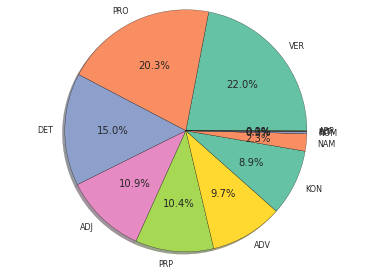

In [23]:
detot.POS.count()
print(detot.POS.value_counts()/detot.POS.count())
plt.pie(detot.POS.value_counts()/detot.POS.count(), shadow=True,
                                                    autopct='%1.1f%%', 
                                                    colors=sns.color_palette("Set2"),
                                                    labels=(detot.POS.value_counts()/detot.POS.count()).index)
plt.axis('equal')

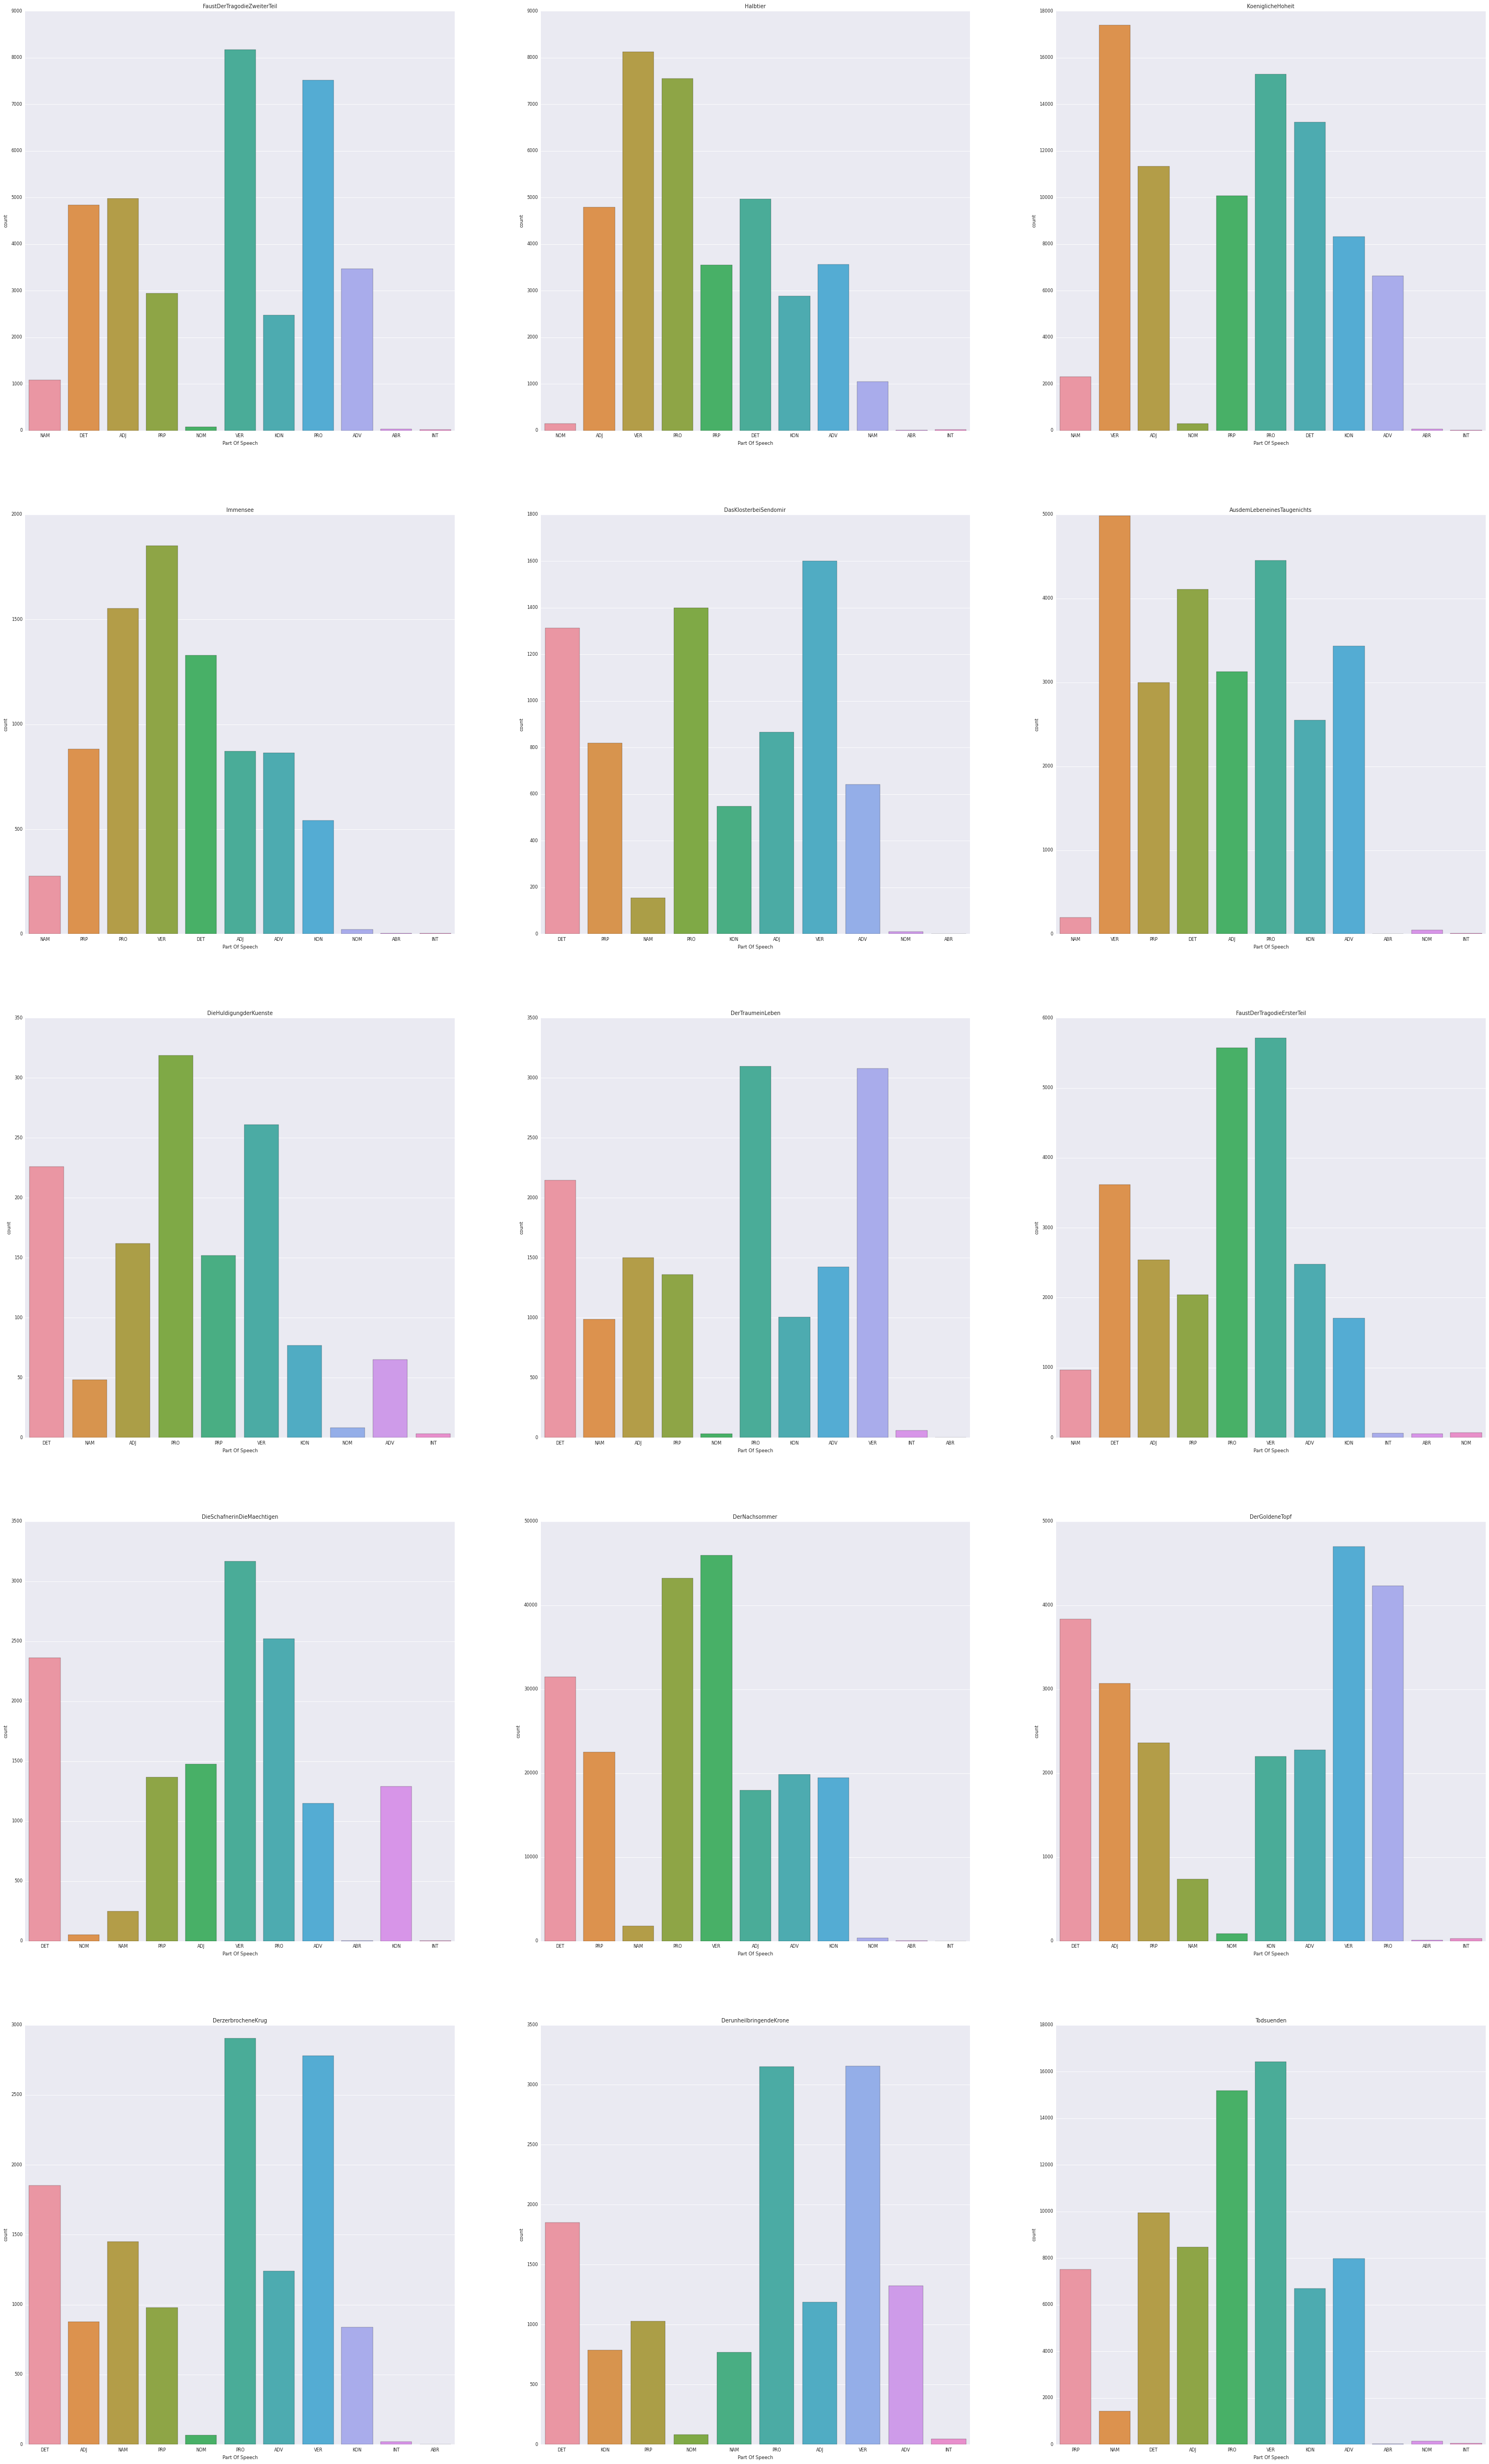

In [24]:
f,axes = plt.subplots(5,3, figsize=(48,80))
for (i,text) in enumerate(de):
    sns.countplot(x=de[text].POS,ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title(text)
    axes[i//3][i%3].set_xlabel("Part Of Speech")


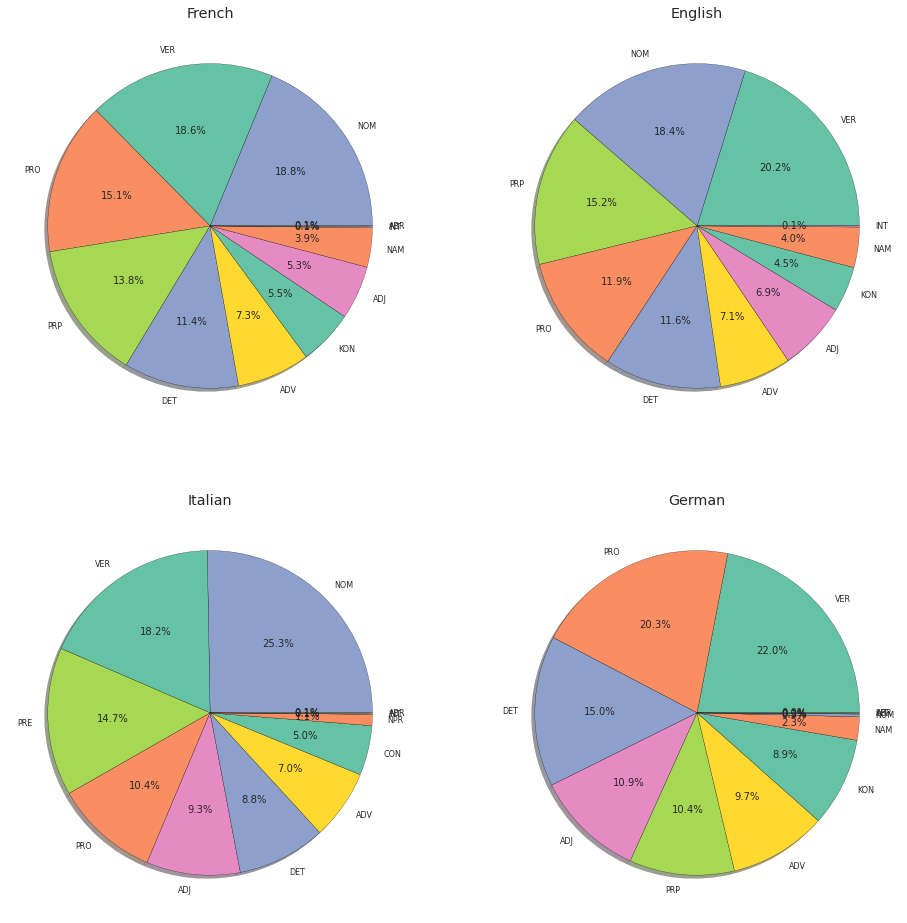

In [25]:
colormap = {value:sns.color_palette("Set2")[index%6] for (index,value) in enumerate((detot.POS.value_counts()/detot.POS.count()).index)}
colormap["PRE"] = colormap["PRP"]
colormap["CON"] = colormap["KON"]
colormap["NPR"] = colormap["NAM"]
plt.figure(figsize=(16,16))
the_grid = plt.GridSpec(2, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(pd.concat(fr).POS.value_counts()/pd.concat(fr).POS.count(), shadow=True,
                                                                    autopct='%1.1f%%', 
                                                                    colors=[colormap[i] for i in (pd.concat(fr).POS.value_counts()/pd.concat(fr).POS.count()).index],
                                                                    labels=(pd.concat(fr).POS.value_counts()/pd.concat(fr).POS.count()).index)
plt.title("French",y=1.0, fontsize='x-large')
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(pd.concat(en).POS.value_counts()/pd.concat(en).POS.count(), shadow=True,
                                                                    autopct='%1.1f%%', 
                                                                    colors=[colormap[i] for i in (pd.concat(en).POS.value_counts()/pd.concat(en).POS.count()).index],
                                                                    labels=(pd.concat(en).POS.value_counts()/pd.concat(en).POS.count()).index)
plt.title("English",y=1.0, fontsize='x-large' )
plt.subplot(the_grid[1, 0], aspect=1)
plt.pie(pd.concat(it).POS.value_counts()/pd.concat(it).POS.count(), shadow=True,
                                                                    autopct='%1.1f%%', 
                                                                    colors=[colormap[i] for i in (pd.concat(it).POS.value_counts()/pd.concat(it).POS.count()).index],
                                                                    labels=(pd.concat(it).POS.value_counts()/pd.concat(it).POS.count()).index)
plt.title("Italian",y=1.0, fontsize='x-large')
plt.subplot(the_grid[1, 1], aspect=1)
plt.pie(detot.POS.value_counts()/detot.POS.count(), shadow=True,
                                                    autopct='%1.1f%%', 
                                                    colors=[colormap[i] for i in (detot.POS.value_counts()/detot.POS.count()).index],
                                                    labels=(detot.POS.value_counts()/detot.POS.count()).index)
plt.title("German",y=1.0, fontsize='x-large')

# plt.savefig("../Paper/tex/img/pie.pdf", transparent=True)

In [26]:
de_descr = pd.Series([(de[text][de[text].POS == "ADV"].POS.count()+de[text][de[text].POS == "ADJ"].POS.count())/de[text].POS.count() for text in de])
de_descr
en_descr = pd.Series([(en[text][en[text].POS == "ADV"].POS.count()+en[text][en[text].POS == "ADJ"].POS.count())/en[text].POS.count() for text in en])
en_descr
it_descr = pd.Series([(it[text][it[text].POS == "ADV"].POS.count()+it[text][it[text].POS == "ADJ"].POS.count())/it[text].POS.count() for text in it])
it_descr
fr_descr = pd.Series([(fr[text][fr[text].POS == "ADV"].POS.count()+fr[text][fr[text].POS == "ADJ"].POS.count())/fr[text].POS.count() for text in fr])
fr_descr

0     0.119004
1     0.137377
2     0.135311
3     0.160888
4     0.158064
5     0.112272
6     0.154833
7     0.172589
8     0.110786
9     0.108336
10    0.107450
11    0.145550
12    0.128330
13    0.138018
14    0.096949
15    0.139190
16    0.116075
dtype: float64

In [27]:
en_frame = pd.DataFrame({"prop":en_descr,"Lang":pd.Series(["EN"]*len(en_descr))})
de_frame = pd.DataFrame({"prop":de_descr,"Lang":pd.Series(["DE"]*len(de_descr))})
it_frame = pd.DataFrame({"prop":it_descr,"Lang":pd.Series(["IT"]*len(it_descr))})
fr_frame = pd.DataFrame({"prop":fr_descr,"Lang":pd.Series(["FR"]*len(fr_descr))})

In [28]:
all = pd.concat((en_frame,de_frame,it_frame,fr_frame))
all.Lang = all.Lang.astype('category')
all.head()

,Lang,prop
0,EN,0.165034
1,EN,0.139069
2,EN,0.145790
3,EN,0.150286
4,EN,0.130455


In [29]:
langs = ["EN", "DE","FR","IT"]

In [30]:
for lang in langs:
    print(lang)
    print("Mean: ",all[all.Lang==lang].prop.mean())
    print("Variance: ",stats.variation(all[all.Lang==lang].prop))
    print(stats.normaltest(all[all.Lang==lang].prop))
    print("---")

EN
Mean:  0.140909845314
Variance:  0.0678282208531
NormaltestResult(statistic=3.0110421705838717, pvalue=0.2219016340225079)
---
DE
Mean:  0.206612395881
Variance:  0.115022985655
NormaltestResult(statistic=0.0099871887446629955, pvalue=0.99501885289256331)
---
FR
Mean:  0.131824706685
Variance:  0.161024957534
NormaltestResult(statistic=1.2100598048583158, pvalue=0.54605809793198723)
---
IT
Mean:  0.163801822107
Variance:  0.0834689868574
NormaltestResult(statistic=0.92653294385048035, pvalue=0.62922493938539337)
---


/Users/murraytannock/Documents/REM/Test/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/murraytannock/Documents/REM/Test/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/Users/murraytannock/Documents/REM/Test/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [31]:
for (t1,t2) in itertools.combinations(langs,2):
    print("Welch's T-Test between ",t1," and ",t2)
    print(stats.ttest_ind(all[all.Lang==t1].prop,all[all.Lang==t2].prop,equal_var=False))
    print("---")

Welch's T-Test between  EN  and  DE
Ttest_indResult(statistic=-9.6819480167762784, pvalue=1.5200888646901881e-08)
---
Welch's T-Test between  EN  and  FR
Ttest_indResult(statistic=1.5610506988532995, pvalue=0.13263548151992668)
---
Welch's T-Test between  EN  and  IT
Ttest_indResult(statistic=-4.6340902826462917, pvalue=0.00027137525722193198)
---
Welch's T-Test between  DE  and  FR
Ttest_indResult(statistic=9.0359511377941164, pvalue=7.7946209936640391e-10)
---
Welch's T-Test between  DE  and  IT
Ttest_indResult(statistic=5.5718069055272306, pvalue=1.1335558916019799e-05)
---
Welch's T-Test between  FR  and  IT
Ttest_indResult(statistic=-4.671545805985855, pvalue=8.0144210656991956e-05)
---


/Users/murraytannock/Documents/REM/Test/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


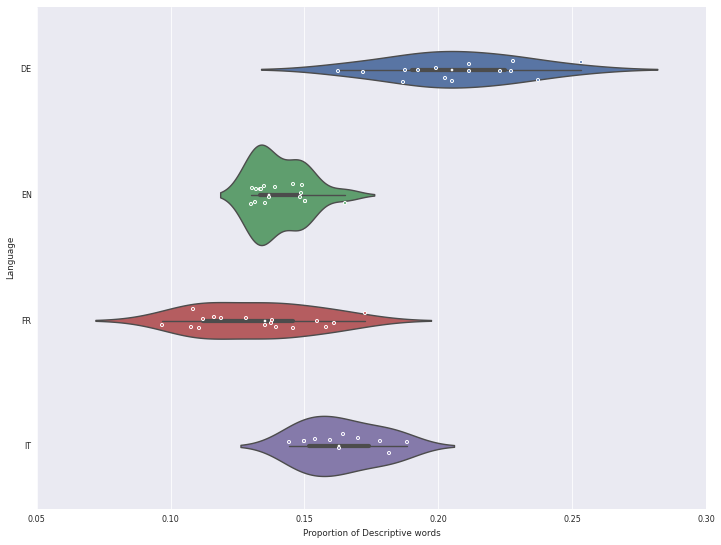

In [32]:
plt.figure(figsize=(12,9))
sns.violinplot(x="prop", y="Lang",data=all)
sns.stripplot(x="prop", y="Lang", data=all, jitter=True, size=3)
ax = plt.gca()
ax.set_xlabel("Proportion of Descriptive words")
ax.set_ylabel("Language")
# plt.savefig("../Paper/tex/img/violin.pdf")